# MNIST - Categorical Classification
> # Convolutional Neural Network
- CNN특징
- input data로 2차원 데이터를 그대로 입력한다. 2차원 특징 지역성(위치정보) 보존
- parameter수가 줄어들면서 성능 up
- cnn layer로는 분류 못하므로 마지막에 꼭 dense layer를 통해 분류한다.


In [1]:
import warnings
warnings.filterwarnings('ignore')

* import Tensorflow

In [2]:
import tensorflow

tensorflow.__version__

'2.15.0'

# I. MNIST Data_Set Load

In [3]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

11490434/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

# II. Data Preprocessing

> ## 1) Normalization

* 범위: 0 ~ 1

In [6]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

> ## 2) Reshape

 * (60000, 28, 28) to (60000, 28, 28, 1)

In [7]:
X_train = X_train.reshape((60000, 28, 28, 1)) # CNN은 rank3형으로 입력해야함
X_test = X_test.reshape((10000, 28, 28, 1))

In [8]:
X_train[0].shape

(28, 28, 1)

> ## 3) One Hot Encoding

In [9]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

> ## 4) train_test_split( )

* Train(48,000) vs. Validation(12,000)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size = 0.2,
                                                      random_state = 2045)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((48000, 28, 28, 1), (48000, 10), (12000, 28, 28, 1), (12000, 10))

# III. MNIST Keras Modeling

> ## 1) Model Define

* Feature Extraction Layer

In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 55744 

* Classification Layer

In [13]:
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

> ## 2) Model Compile

* 모델 학습방법 설정

In [15]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 약 5분

In [16]:
model.fit?

In [17]:
%%time

Hist_mnist = model.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
375/375 [==============================] - 8s 7ms/step - loss: 0.3659 - accuracy: 0.8829 - val_loss: 0.0899 - val_accuracy: 0.9735
Epoch 2/100
375/375 [==============================] - 3s 7ms/step - loss: 0.0974 - accuracy: 0.9698 - val_loss: 0.0591 - val_accuracy: 0.9833
Epoch 3/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0686 - accuracy: 0.9784 - val_loss: 0.0499 - val_accuracy: 0.9858
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0549 - accuracy: 0.9827 - val_loss: 0.0465 - val_accuracy: 0.9877
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0470 - accuracy: 0.9854 - val_loss: 0.0449 - val_accuracy: 0.9868
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0429 - accuracy: 0.9869 - val_loss: 0.0403 - val_accuracy: 0.9883
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0377 - accuracy: 0.9877 - val_loss: 0.0355 - val_accuracy: 0.9896

> ## 4) 학습 결과 시각화

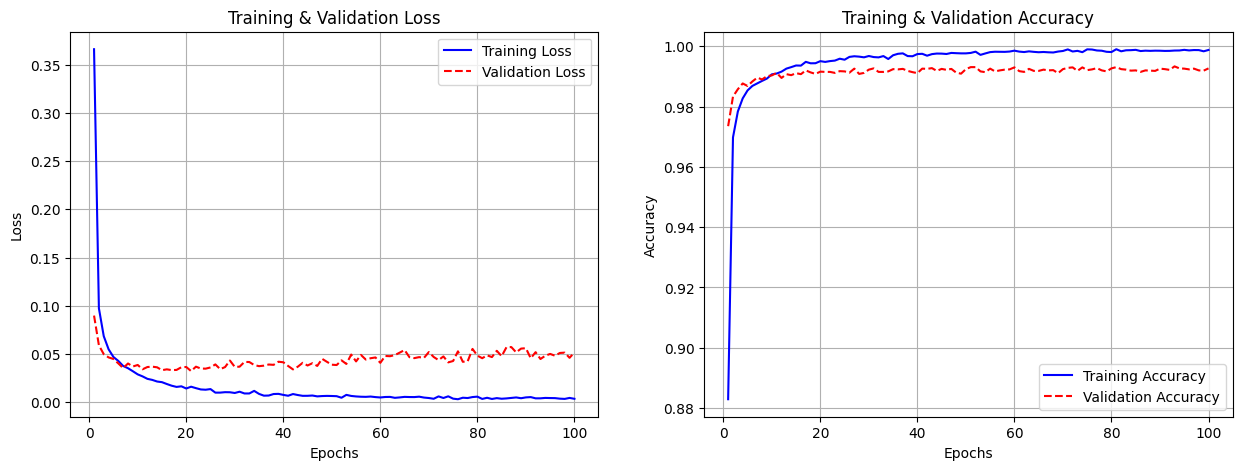

In [18]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_mnist.history['loss'], 'b-')
plt.plot(epochs, Hist_mnist.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_mnist.history['accuracy'], 'b-')
plt.plot(epochs, Hist_mnist.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [19]:
loss, accuracy = model.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 0.0378 - accuracy: 0.9929
Loss = 0.03778
Accuracy = 0.99290


# The End